#### Import of libraries and uploading dataset from csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("/home/student/Pulpit/nypd.csv", low_memory=False)

##### Factors of accidents are listed in five columns Vehicle type code 1-5. 
##### These factors now will be counted and saved in five DataSeries, each for one column. Then, new DataSeries will be merged, gropped and 3 factors with the highest count values will be selected.
###### As we can see in kernel 6_Statistic..., some accidents did not have specified borough. For now, these entries will be excluded. In the future, next step in this kernel will be to define borough according to lattitude and longitude given in the dataset.

In [3]:
boroughs = ["BROOKLYN","BRONX","MANHATTAN","QUEENS","STATEN ISLAND"]
results = {"BROOKLYN" : [], "BRONX":[], "MANHATTAN":[],"QUEENS": [], "STATEN ISLAND":[]}
results_renamed={"BROOKLYN" : [], "BRONX":[], "MANHATTAN":[],"QUEENS": [], "STATEN ISLAND":[]}
for bi in range (0,5):
    borough_name = boroughs[bi]
    borough_data = raw_data.loc[raw_data['BOROUGH'] == borough_name]
    for i in range (1,6):
        column_name = "CONTRIBUTING FACTOR VEHICLE "+str(i)
        results[borough_name].append(pd.Series(borough_data.value_counts(column_name)).reset_index())
        results_renamed[borough_name].append(results[borough_name][i-1].rename(columns={column_name:"FACTOR","count":"COUNT"}))

In [4]:
merged_factors_for_manhattan = pd.concat([results_renamed["MANHATTAN"][0],
                                          results_renamed["MANHATTAN"][1],
                                          results_renamed["MANHATTAN"][2],
                                          results_renamed["MANHATTAN"][3],
                                          results_renamed["MANHATTAN"][4]],ignore_index=True)
grouped_list_for_manhattan= pd.DataFrame(merged_factors_for_manhattan.groupby(by='FACTOR').sum())
sorted_list_for_manhattan = pd.DataFrame(grouped_list_for_manhattan.sort_values(by='COUNT',ascending=False).head(3))

merged_factors_for_brooklyn = pd.concat([results_renamed["BROOKLYN"][0],
                                          results_renamed["BROOKLYN"][1],
                                          results_renamed["BROOKLYN"][2],
                                          results_renamed["BROOKLYN"][3],
                                          results_renamed["BROOKLYN"][4]],ignore_index=True)
grouped_list_for_brooklyn = pd.DataFrame(merged_factors_for_brooklyn.groupby(by='FACTOR').sum())
sorted_list_for_brooklyn = pd.DataFrame(grouped_list_for_brooklyn.sort_values(by='COUNT',ascending=False).head(3))

merged_factors_for_bronx = pd.concat([results_renamed["BRONX"][0],
                                          results_renamed["BRONX"][1],
                                          results_renamed["BRONX"][2],
                                          results_renamed["BRONX"][3],
                                          results_renamed["BRONX"][4]],ignore_index=True)
grouped_list_for_bronx = pd.DataFrame(merged_factors_for_bronx.groupby(by='FACTOR').sum())
sorted_list_for_bronx = pd.DataFrame(grouped_list_for_bronx.sort_values(by='COUNT',ascending=False).head(3))

merged_factors_for_queens = pd.concat([results_renamed["QUEENS"][0],
                                          results_renamed["QUEENS"][1],
                                          results_renamed["QUEENS"][2],
                                          results_renamed["QUEENS"][3],
                                          results_renamed["QUEENS"][4]],ignore_index=True)
grouped_list_for_queens= pd.DataFrame(merged_factors_for_queens.groupby(by='FACTOR').sum())
sorted_list_for_queens = pd.DataFrame(grouped_list_for_queens.sort_values(by='COUNT',ascending=False).head(3))

merged_factors_for_staten_island= pd.concat([results_renamed["STATEN ISLAND"][0],
                                          results_renamed["STATEN ISLAND"][1],
                                          results_renamed["STATEN ISLAND"][2],
                                          results_renamed["STATEN ISLAND"][3],
                                          results_renamed["STATEN ISLAND"][4]],ignore_index=True)
grouped_list_for_staten_island = pd.DataFrame(merged_factors_for_staten_island.groupby(by='FACTOR').sum())
sorted_list_for_staten_island = pd.DataFrame(grouped_list_for_staten_island.sort_values(by='COUNT',ascending=False).head(3))

#### Exemplary results (all, not top 3) are given below. The most common cause is "unspecified", which can mean that there could be more than one factor of accident or the cause was diffucult to define. Interesting factors are "1 " and "80".

In [5]:
grouped_list_for_queens

,COUNT
FACTOR,
1,3
80,37
Accelerator Defective,172
Aggressive Driving/Road Rage,1094
Alcohol Involvement,3518
...,...
Unspecified,366160
Using On Board Navigation Device,12
Vehicle Vandalism,11


#### All results for each borough will be merged into one DataFrame. During calculations DataFrames without label about specified borough were obtained, therefore it is needed to add these labels before merging. Additionally, new column will be prepared, sum of columns Factor and Borough - it will be needed for following plot.

In [6]:
sorted_list_for_staten_island.insert(0,"BOROUGH",["Staten Island","Staten Island","Staten Island"])
sorted_list_for_bronx.insert(0,"BOROUGH",["Bronx","Bronx","Bronx"])
sorted_list_for_queens.insert(0,"BOROUGH",["Queens","Queens","Queens"])
sorted_list_for_manhattan.insert(0,"BOROUGH",["Manhattan","Manhattan","Manhattan"])
sorted_list_for_brooklyn.insert(0,"BOROUGH",["Brooklyn","Brooklyn","Brooklyn"])
merged_list = pd.concat([sorted_list_for_staten_island,
                         sorted_list_for_queens,
                         sorted_list_for_brooklyn,
                         sorted_list_for_bronx,
                         sorted_list_for_manhattan])
merged_list["FACTOR IN BOROUGH"]=merged_list['BOROUGH']+', '+merged_list.index

#### Preparing data for plot

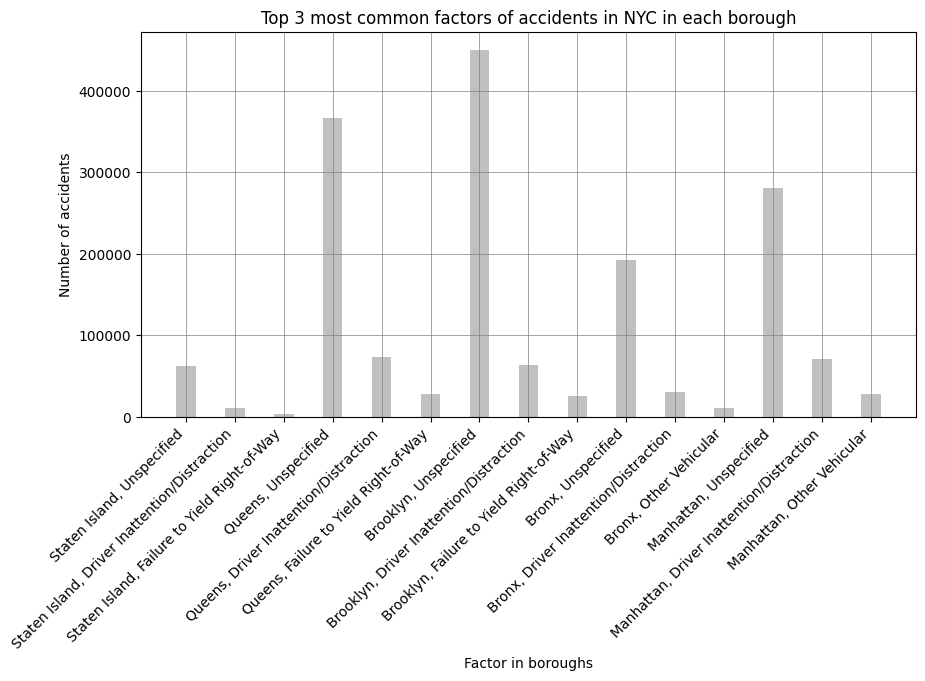

In [7]:
x = merged_list["FACTOR IN BOROUGH"]
y = merged_list["COUNT"]
fig = plt.figure(figsize = (10, 5))

plt.bar(x, y, color ='#C0C0C0', width = 0.4)
 
plt.xlabel("Factor in boroughs")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of accidents")
plt.ticklabel_format(style='plain', axis="y")
plt.grid(True, color = "grey", linewidth = "0.5", linestyle = "-")
plt.title("Top 3 most common factors of accidents in NYC in each borough")
plt.show()

### Conlusions
#### The most common cause of accidents in each borough is "unspecified", which can mean that there could be more than one factor of accident or the cause was diffucult to define. Second and third most common factor of collisions are driver inatention, failure to yield right-of-way or other vehicular.